# EDA and Revised Project Statement

Before data exploration, we read through recent publications from the Alzheimer’s Disease Neuroimaging Initiative to find out clinical cognitive tests and imaging techniques used to detect AD. So we have a basic understanding of how biomarkers and brain change in the progression of Alzheimer's disease [1, 2].

We initially used Excel to explore the data. First, we identified what each predictor represents. By filtering categorical predictors, we checked the number of levels for each categorical predictor and determined if encoding was necessary. Then we used Python to read in the data and perform data cleaning. We only analyzed data collected under ADNI1 protocol.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)

In [2]:
adnimerge = pd.read_csv("ADNIMERGE.csv")
adnimerge = adnimerge[adnimerge.COLPROT=="ADNI1"]
adnimerge.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,9/8/05,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,50:48.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,9/12/05,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.000000,0.00000,0,0,50:48.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,3/13/06,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.498289,5.96721,6,6,50:48.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,9/12/06,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.999316,11.96720,12,12,50:48.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,9/12/07,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,1.998630,23.93440,24,24,50:48.0


#### Deleted Columns & Reasons:
- Unnecessary information due to data selection: `COLPROT`, `ORIGPROT`
- Unrelated information: `PTID`, `SITE`,`EXAMDATE`,`FLDSTRENG`, `FSVERSION`
- Information explained by other predictors: `VISCODE`, 
- Too much missing data: `AV45`, `AV45_bl`
- Complete data missing  due to group selection: `MOCA`, `EcogPtMem`, `EcogPtLang`, `EcogPtVisspat`, `EcogPtPlan`, `EcogPtOrgan`, `EcogPtDivatt`, `EcogPtTotal`, `EcogSPMem`, `EcogSPLang`, `EcogSPVisspat`, `EcogSPPlan`, `EcogSPOrgan`, `EcogSPDivatt`, `EcogSPTotal`
- Unnecessary for modeling but saved in another table for later use: all `xxx_bl` predictors except `Month_bl` and `AV45_bl`

In [3]:
cols_of_interests = ['RID', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT',
                     'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB',
                     'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate', 
                     'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting',
                     'FAQ', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 
                     'Fusiform', 'MidTemp', 'ICV', 'DX', 'Month_bl', 'Month']
cols_bl = ['CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl', 'RAVLT_immediate_bl',
           'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 
           'FAQ_bl', 'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
           'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'FDG_bl','PIB_bl']

adnimerge_clean = adnimerge[cols_of_interests].copy()
adnimerge_clean.head()

,RID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,...,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,Month_bl,Month
0,2,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.36926,...,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,0.00000,0
1,3,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.09079,...,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,0.00000,0
2,3,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.06360,...,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,Dementia,5.96721,6
3,3,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10384,...,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,11.96720,12
4,3,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.03871,...,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0,Dementia,23.93440,24


We are mainly dealing with numeric and categorical data. Speaking of categorical variables, we transformed all of them into numeric values. For baseline diagnosis `DX_bl`, we mapped cognitive normal `CN` to 0, cognitive impairment `LMCI` to 1 and Alzheimer's Disease `AD` to 2.  For gender `PTGENDER`, we labeled `Female` as 0, and `Male` as 1. We use one-hot encoding for all other categorical variables. Some of the data has longitudinal component, but we will ignore its effect for now and treat all observations as independent observations.

In [4]:
adnimerge_clean['DX_bl'] = adnimerge_clean['DX_bl'].map({'CN':0,'LMCI':1,'AD':2})
adnimerge_clean['PTGENDER'] = adnimerge_clean['PTGENDER'].map({'Female':0,'Male':1})
adnimerge_clean = pd.get_dummies(adnimerge_clean, columns=['PTRACCAT'], drop_first=True)
adnimerge_clean = adnimerge_clean[adnimerge_clean.PTETHCAT!='Unknown']
adnimerge_clean = adnimerge_clean[adnimerge_clean.PTMARRY!='Unknown']
adnimerge_clean = pd.get_dummies(adnimerge_clean, columns=['PTMARRY'], drop_first=True)

col_names_replaced = [col.replace(' ', '_') for col in adnimerge_clean.columns]
adnimerge_clean.rename(columns=dict(zip(adnimerge_clean.columns, col_names_replaced)), inplace=True)

print(adnimerge_clean.shape)
adnimerge_clean.head()

(4981, 35)


,RID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,APOE4,FDG,PIB,CDRSB,...,DX,Month_bl,Month,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_More_than_one,PTRACCAT_White,PTMARRY_Married,PTMARRY_Never_married,PTMARRY_Widowed
0,2,0,74.3,1,16,Not Hisp/Latino,0.0,1.36926,NaN,0.0,...,CN,0.00000,0,0,0,0,1,1,0,0
1,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.09079,NaN,4.5,...,Dementia,0.00000,0,0,0,0,1,1,0,0
2,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.06360,NaN,6.0,...,Dementia,5.96721,6,0,0,0,1,1,0,0
3,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.10384,NaN,3.5,...,Dementia,11.96720,12,0,0,0,1,1,0,0
4,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.03871,NaN,8.0,...,Dementia,23.93440,24,0,0,0,1,1,0,0


The number of patients who are LMCI is twice the number of AD and CN respectively.

In [5]:
print('Number of CN   patients:',
      np.sum((adnimerge_clean['DX_bl']==0)&(adnimerge_clean['Month']==0)))
print('Number of LMCI patients:',
      np.sum((adnimerge_clean['DX_bl']==1)&(adnimerge_clean['Month']==0)))
print('Number of AD   patients:',
      np.sum((adnimerge_clean['DX_bl']==2)&(adnimerge_clean['Month']==0)))

Number of CN   patients: 227
Number of LMCI patients: 399
Number of AD   patients: 186


We plotted histograms for each numeric predictor and separated each baseline diagnosis with different colors. 

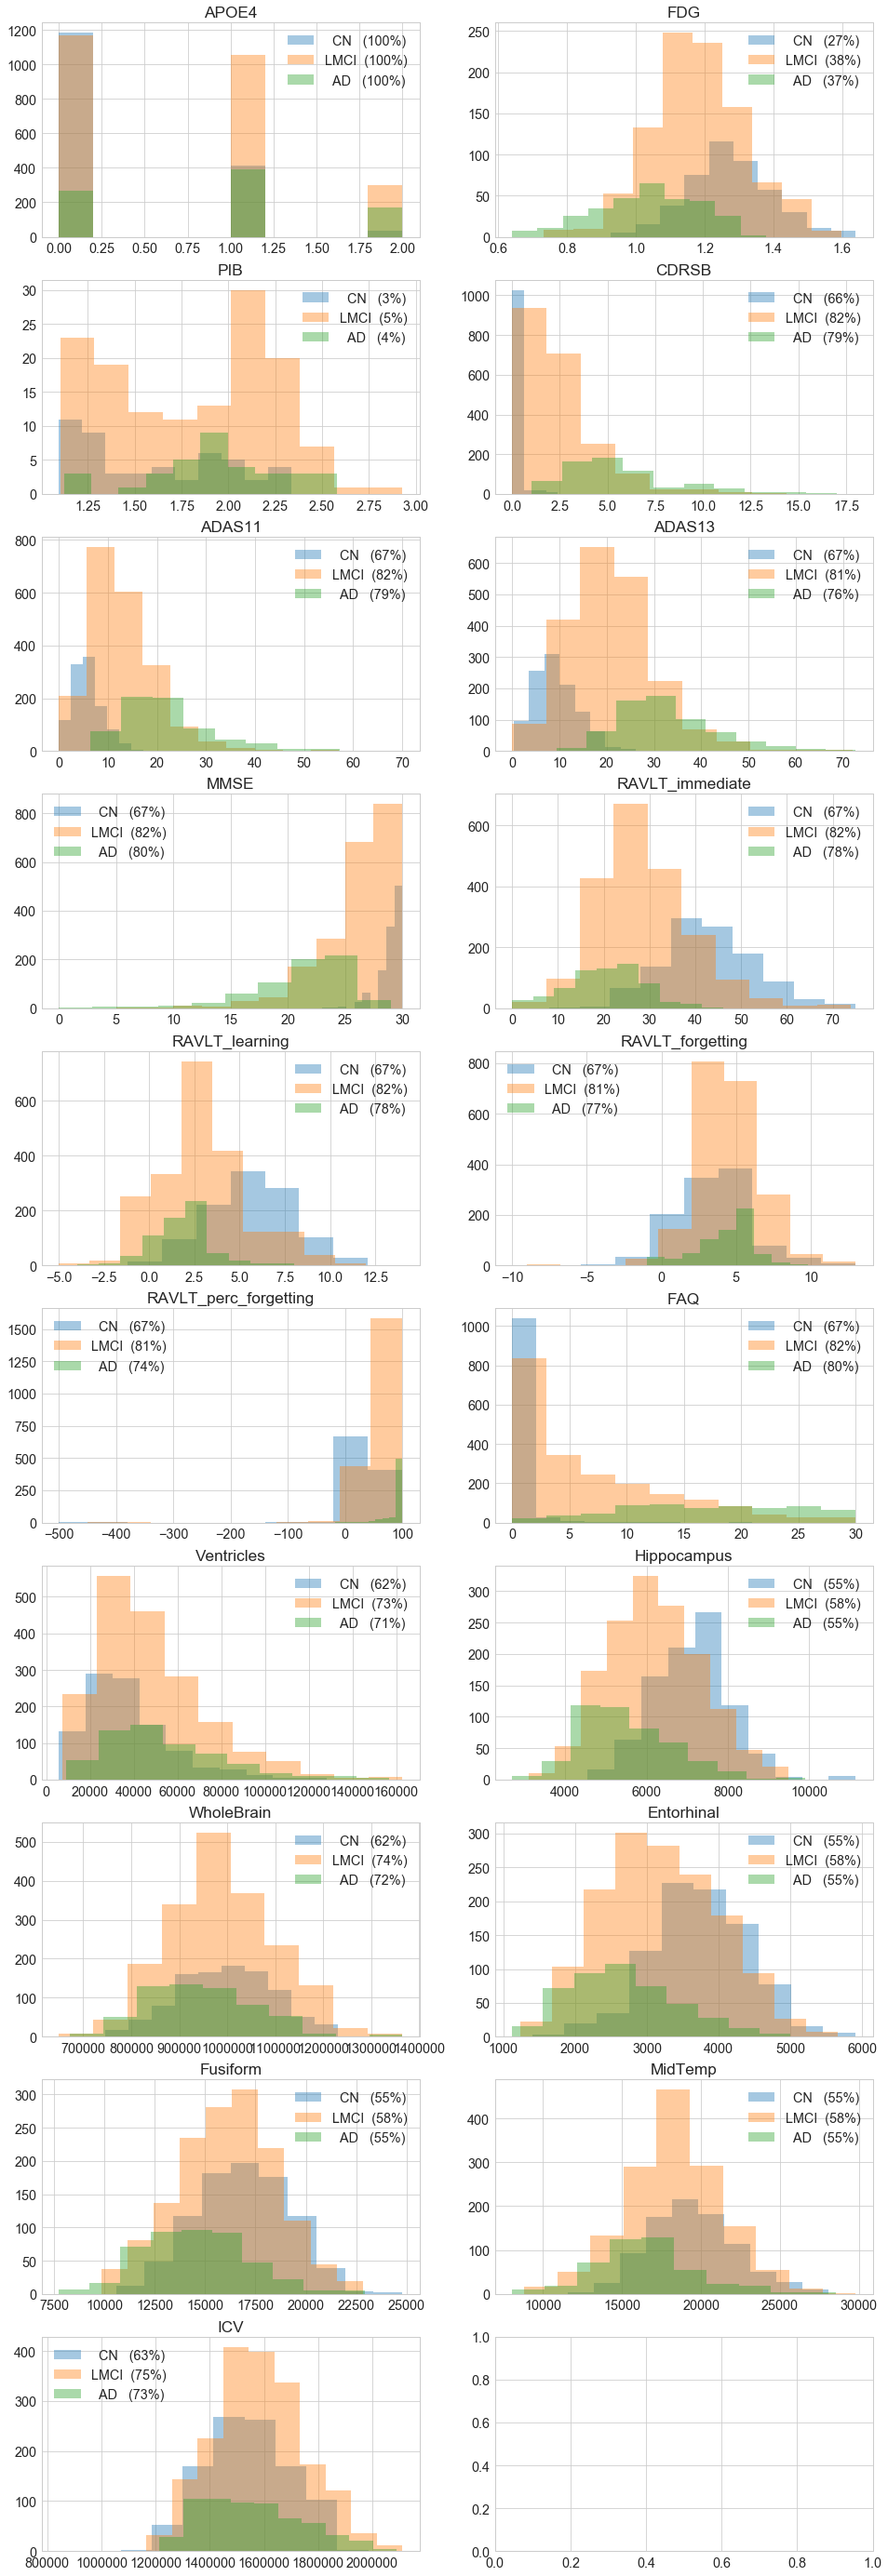

In [6]:
adnimerge_clean_CN = adnimerge_clean[adnimerge_clean['DX_bl']==0]
adnimerge_clean_LMCI = adnimerge_clean[adnimerge_clean['DX_bl']==1]
adnimerge_clean_AD = adnimerge_clean[adnimerge_clean['DX_bl']==2]

fig, ax = plt.subplots(10, 2, figsize=(16, 50))
for i in range(6, 25):
    row = (i-6)//2
    col = (i-6) % 2
    col_name = adnimerge_clean.columns[i]
    mis_rate_CN = np.mean(adnimerge_clean_CN[col_name].isnull())
    mis_rate_LMCI = np.mean(adnimerge_clean_LMCI[col_name].isnull())
    mis_rate_AD = np.mean(adnimerge_clean_AD[col_name].isnull())
    adnimerge_clean_CN[col_name].hist(
        ax=ax[row, col], alpha=0.4, 
        label='{:^6} ({:0.0f}%)'.format('CN', 100*(1-mis_rate_CN)))
    adnimerge_clean_LMCI[col_name].hist(
        ax=ax[row, col], alpha=0.4, 
        label='{:^5} ({:0.0f}%)'.format('LMCI', 100*(1-mis_rate_LMCI)))
    adnimerge_clean_AD[col_name].hist(
        ax=ax[row, col], alpha=0.4, 
        label='{:^6} ({:0.0f}%)'.format('AD', 100*(1-mis_rate_AD)))
    ax[row, col].set_title(col_name)
    ax[row, col].legend(loc='best')

#### Histograms Interpretation

- `APOE4` `CDRSB` and `FAQ`: All the cognitive normal `CN` patients have a value close to 0. As the value increases, it is more likely that the patient has Alzheimer’s disease. Cognitive impairment `LMCI` and Alzheimer’s Disease `AD` patients can have different values for these two variables. That shows if the value is not 0, then the patient is experiencing some sort of dementia.

- `RAVLT_perc_forgetting`, `ADAS11` and `ADAS13`: From the plot, it seems that as the value increases, the likelihood of `AD` also increases. It indicates high values are associated with Alzheimer’s Disease, which agrees with the result of previous study[3].

- `Ventricles`, `WholeBrain`, `MidTemp`, and `ICV` roughly follow normal distribution with similar mean for all three categories.

- `FDG`, `MMSE`, `Hippocampus`, `Entorhinal`, and `Fusiform` have negative relationship with Alzheimer’s. As the value of these variables decreases, it is more likely to get AD. 

We also plotted a heatmap to find out the collinearity between each numeric predictor.

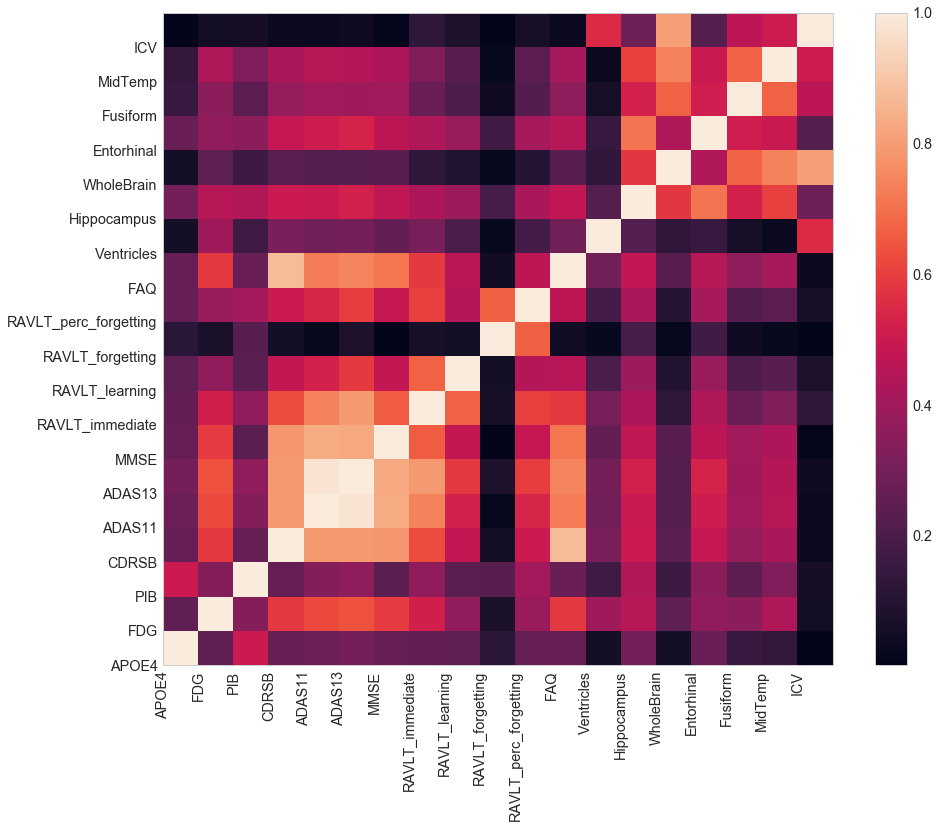

In [7]:
def plot_correlation_heatmap(df, ax):
    df_copy = df.copy()
    N = df.shape[1]
    corr_matrix = np.zeros((N, N))
    for i,icol in enumerate(df.columns):
        for j,jcol in enumerate(df.columns):
            idx_available = np.where(
                (~df[icol].isnull()) & (~df[jcol].isnull()))
            ival = df[icol].values[idx_available]
            jval = df[jcol].values[idx_available]
            cov = np.mean(ival*jval) - np.mean(ival)*np.mean(jval)
            corr = cov / np.std(ival) / np.std(jval)
            corr_matrix[i,j] = corr
            
    ax.set_xticks(ticks=range(len(df.columns)))
    ax.set_yticks(ticks=range(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation='vertical')
    ax.set_yticklabels(df.columns)
    plot = ax.pcolor(np.abs(corr_matrix))
    return plot

cols_continuous = adnimerge_clean.columns[6:25]
fig, ax = plt.subplots(figsize=(15,12))
plot = plot_correlation_heatmap(adnimerge_clean[cols_continuous], ax)
fig.colorbar(plot)

#### Heatmap Interpretation/Predictor Correlations

Note: The heatmap is obtained by only considering the value that are not None in both predictors.

According to the heap map of all selected predictors, there are high correlations ($\le 0.9$) between the following pairs of predictors: `CDRSB` vs `FAQ`, `ADAS11` vs `ADAS13`, and `WholeBrain` vs `ICV`. To deal with these correlations, we may keep only one predictor from each correlated pair or group based on previous studies. Specifically, we will review scientific papers that investigat the importance of the factors mentioned above related to the prediction of Alzheimer’s Disease.


#### Imputation by Mean
Almost all numeric columns have missing values, so we use mean to impute the missing values. 

In [8]:
def imputation_mean(df, cols):
    df_copy = df.copy()
    for c in cols:
        c_mean = np.mean(df[c])
        df_copy[c] = df[c].map(lambda x:c_mean if np.isnan(x) else x)
    return df_copy

adnimerge_imputed = imputation_mean(adnimerge_clean, cols_continuous)
print(adnimerge_imputed.shape)
adnimerge_imputed.head()

(4981, 35)


,RID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,APOE4,FDG,PIB,CDRSB,...,DX,Month_bl,Month,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_More_than_one,PTRACCAT_White,PTMARRY_Married,PTMARRY_Never_married,PTMARRY_Widowed
0,2,0,74.3,1,16,Not Hisp/Latino,0.0,1.36926,1.781273,0.0,...,CN,0.00000,0,0,0,0,1,1,0,0
1,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.09079,1.781273,4.5,...,Dementia,0.00000,0,0,0,0,1,1,0,0
2,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.06360,1.781273,6.0,...,Dementia,5.96721,6,0,0,0,1,1,0,0
3,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.10384,1.781273,3.5,...,Dementia,11.96720,12,0,0,0,1,1,0,0
4,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.03871,1.781273,8.0,...,Dementia,23.93440,24,0,0,0,1,1,0,0


#### Project statement
Alzheimer’s Disease is a common form of dementia that usually starts slowly and worsens over time. In the United States, more than 5 million people aged 65 and over suffer from the disease. The estimated national cost of patient care for Alzheimer’s and other types of dementia was $236 billion in 2016. Specifically, the cost of brain imagings such as PET and MRI in the process of Alzheimer’s Disease (AD) diagnosis is very expensive. So we want to determine the effectiveness of different testing methods so that AD patients can be relatively accurately diagnosed with as few number of tests as possible. In other words, for this project, we aim to determine the performance of different testing methods for AD, and find out the most significant groups of predictors in predicting the diagnosis for patients. 

Furthermore, we would like to take one step further and investigate whether certain AD testing method is more accurate for a certain group of patient (e.g. White male older than 75) in diagnosing AD. To do that, we will conduct statistically testings between groups of patients with shared characteristics on the performance of different testing methods. If some patterns are found, doctors can be even more efficient in diagnosing patients of various background.

So the objective of this project is to build a data-driven model for Alzheimer’s Disease using patient demographic information, medical records, brain imaging data and other related data to predict the diagnosis of patients, particularly focusing on the problem discussed above. We will first investigate through common topics including finding the major causes of Alzheimer’s and evaluating the risk based on predictors. Then our main goal is to perform several advanced analysis on the dataset trying to answer the questions we raised above.



References

[1]. Young, Alexandra L., et al. “A Data-Driven Model Of Biomarker Changes In Sporadic Alzheimer`s Disease.” Alzheimer`s & Dementia, vol. 10, no. 4, 2014, doi:10.1016/j.jalz.2014.04.180.
[2]. Weiner, Michael W. “Recent Publications from the Alzheimer`s Disease Neuroimaging Initiative: Reviewing Progress toward Improved AD Clinical Trials.” Alzheimer`s & Dementia, Elsevier, 22 Mar. 2017, www.sciencedirect.com/science/article/pii/S1552526016331247.
[3]. Moradi, Elaheh et al. “Rey’s Auditory Verbal Learning Test Scores Can Be Predicted from Whole Brain MRI in Alzheimer’s Disease.” NeuroImage : Clinical13 (2017): 415–427. PMC. Web. 26 Nov. 2017.